# Combinational Depth Predictor using Machine Learning

### Initializing the Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

### Loading the Dataset

In [ ]:
df = pd.read_csv("verilog_ml_final_dataset.csv")

### Selecting the Dependent Variable and Target Variable

In [ ]:
df.head()

In [81]:
X = df[['Number of Inputs', 'Number of Outputs', 'Time Delay', 'Gate Count']]
y = df['Combinational Depth']

### Feature Engineering
##### Adding an Interaction term and Applying a Log Transformation on Critical Time

In [ ]:
X = X.copy()

# I added Interaction terms
X.loc[:, 'Inputs * Critical Time'] = X['Number of Inputs'] * X['Time Delay']

# I have applied a Log Transformation on Critical Time to reduce Skewness.
X.loc[:, 'Log Critical Time'] = np.log1p(X["Time Delay"])

### Split Dataset

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Standardization

In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Polynomial Features: Degree set to 2 for best accuracy

In [93]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

### Training the XGBoost Regressor Model

In [94]:
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train_poly, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

### Predictions

In [95]:
y_pred_xgb = xgb_model.predict(X_test_poly)

### Calculations

In [96]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [97]:
print(f'MAE: {mae_xgb:.2f}')
print(f'MSE: {mse_xgb:.2f}')
print(f'R2 Score: {r2_xgb:.3f}')

MAE: 2.28
MSE: 18.15
R2 Score: 0.954


### Plotting the Graph

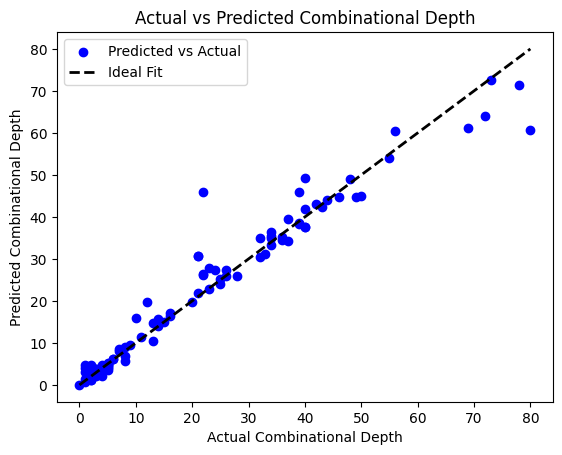

In [98]:
plt.scatter(y_test, y_pred_xgb, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Fit")
plt.xlabel("Actual Combinational Depth")
plt.ylabel("Predicted Combinational Depth")
plt.title("Actual vs Predicted Combinational Depth")
plt.legend()
plt.show()